In [3]:
from pylab import *
from scipy.integrate import *

$$
\frac{d^2}{d \tau ^2} \vec r_p =  - \frac{\hat r_p}{r_p ^2}  
$$

In [55]:
def mov_p_T(t,x_v,mus=[0,0]):
    # x_v = [ xP , yP , xT , yT , dxP , dyP , dxT , dyT ]
    #         0    1    2    3     4     5     6     7
    dxP = x_v[4]
    dyP = x_v[5]
    RP2 = x_v[0]**2 + x_v[1]**2
    ddxP = - x_v[0]/ RP2
    ddyP = - x_v[1]/ RP2
    dxT = x_v[6]
    dyT = x_v[7]
    RT2 = x_v[2]**2 + x_v[3]**2
    ddxT = - x_v[2]/ RT2
    ddyT = - x_v[3]/ RT2
    return array([dxP,dyP,dxT,dyT,ddxP,ddyP,ddxT,ddyT])

In [60]:
intervalo_t = (0,5*pi)
CI = array([0.39,0,1,0,0,0.3,0,1])
sol = solve_ivp(mov_p_T,intervalo_t,CI)

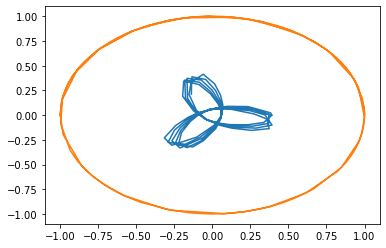

In [61]:
plot(sol.y[0],sol.y[1])
plot(sol.y[2],sol.y[3])
show()